In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iotintrusion/IoT_Intrusion.csv


### Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Load your dataset 
df = pd.read_csv('IoT_Intrusion.csv')

df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,1,0,0,0,0,0,0,1,0,0,0,0,1,1,581.33,54.00,66.3,54.796404,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,441.00,42.00,42.0,42.000000,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,525.00,50.00,50.0,50.000000,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,0,0,0,0,0.0,1.01,0.04,0.0,0.02,0,0,0,0,0,0,0,1,0,0,0,0,1,1,644.60,57.88,131.6,67.959230,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [4]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.763553e+00,7.759537e+04,9.062979e+00,6.635523e+01,9.146945e+03,9.146945e+03,1.807621e-06,8.655842e-02,2.073090e-01,9.057149e-02,...,1.248502e+02,3.345817e+01,1.248978e+02,8.317382e+07,9.497998e+00,1.312711e+01,4.728151e+01,3.147998e+04,9.635824e-02,1.414999e+02
std,2.965660e+02,4.664043e+05,8.936737e+00,1.408680e+01,9.974794e+04,9.974794e+04,8.501385e-04,2.811870e-01,4.053790e-01,2.869989e-01,...,2.420296e+02,1.622552e+02,2.429223e+02,1.703857e+07,8.187710e-01,8.639921e+00,2.294819e+02,3.645895e+05,2.327718e-01,2.105725e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.087155e+00,2.087155e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.581371e+01,1.581371e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.042881e-01,2.781200e+02,1.428000e+01,6.400000e+01,1.174380e+02,1.174380e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405208e+01,3.777740e-01,5.406000e+01,8.334390e+07,9.500000e+00,1.039675e+01,5.059213e-01,1.370916e+00,8.000000e-02,1.415500e+02
max,9.943576e+04,9.815555e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,8.484654e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.252094e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [5]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [6]:
df.shape

(1048575, 47)

In [7]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [8]:
unique_labels = df['label'].unique()
len(unique_labels), unique_labels

(34,
 array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
        'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
        'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
        'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
        'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
        'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
        'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
        'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
        'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
        'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
        'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
       dtype=object))

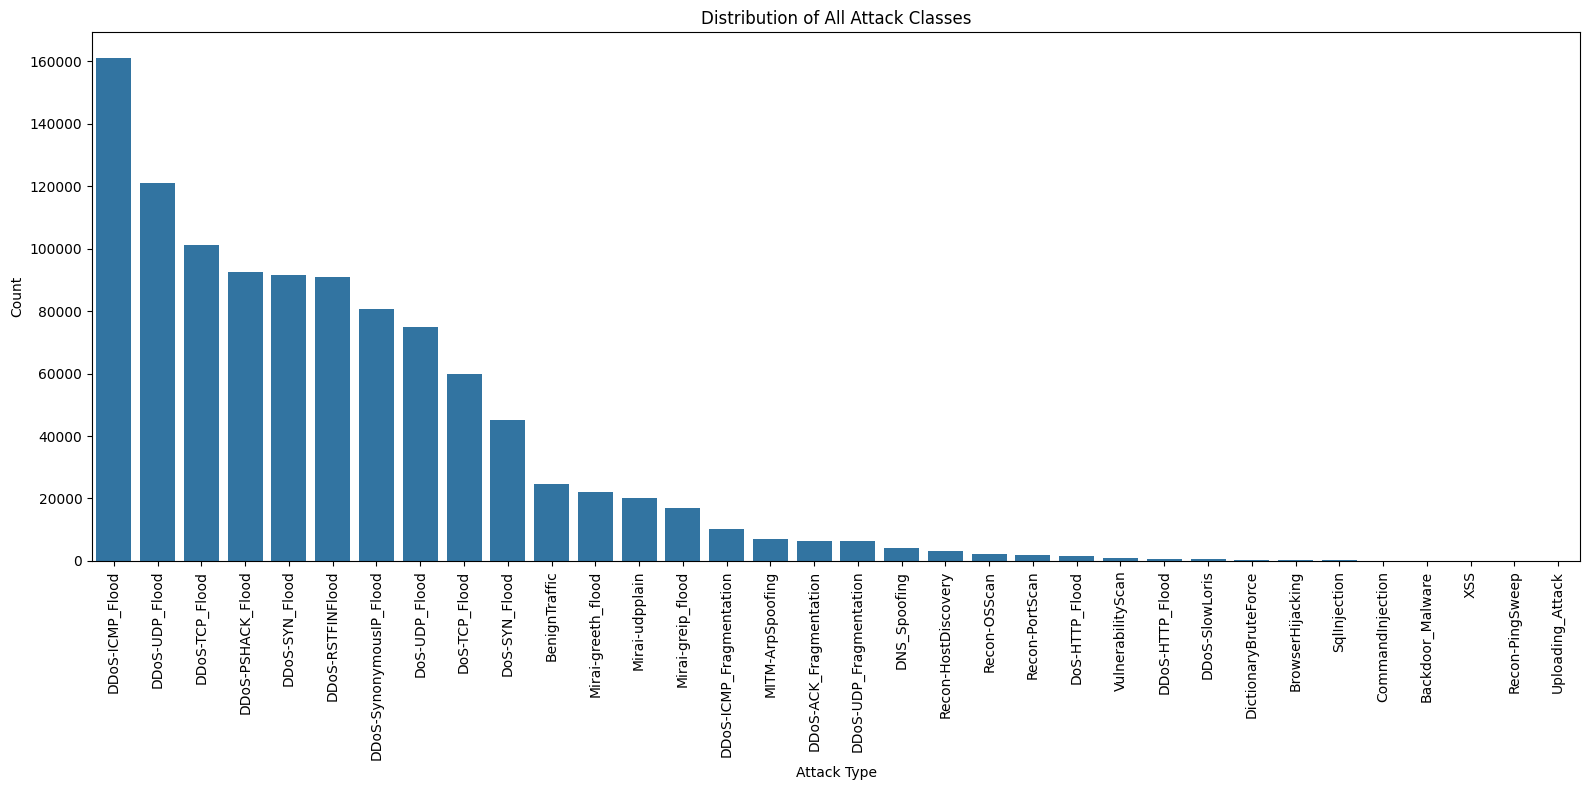

In [9]:
label_counts = df['label'].value_counts()


plt.figure(figsize=(16,8))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution of All Attack Classes")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Attack Type")
plt.tight_layout()
plt.show()

### Data Pre-Processing

In [10]:
df.columns = df.columns.str.replace(" ", "_")

df.head()

,flow_duration,Header_Length,Protocol_Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot_size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [11]:
# Encode the label column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

print("Number of attack classes:", len(label_encoder.classes_))
print("Classes:", label_encoder.classes_)

Number of attack classes: 34
Classes: ['Backdoor_Malware' 'BenignTraffic' 'BrowserHijacking' 'CommandInjection'
 'DDoS-ACK_Fragmentation' 'DDoS-HTTP_Flood' 'DDoS-ICMP_Flood'
 'DDoS-ICMP_Fragmentation' 'DDoS-PSHACK_Flood' 'DDoS-RSTFINFlood'
 'DDoS-SYN_Flood' 'DDoS-SlowLoris' 'DDoS-SynonymousIP_Flood'
 'DDoS-TCP_Flood' 'DDoS-UDP_Flood' 'DDoS-UDP_Fragmentation' 'DNS_Spoofing'
 'DictionaryBruteForce' 'DoS-HTTP_Flood' 'DoS-SYN_Flood' 'DoS-TCP_Flood'
 'DoS-UDP_Flood' 'MITM-ArpSpoofing' 'Mirai-greeth_flood'
 'Mirai-greip_flood' 'Mirai-udpplain' 'Recon-HostDiscovery' 'Recon-OSScan'
 'Recon-PingSweep' 'Recon-PortScan' 'SqlInjection' 'Uploading_Attack'
 'VulnerabilityScan' 'XSS']


In [86]:
import joblib

joblib.dump(label_encoder, 'iot_label_encoder.pkl')

['iot_label_encoder.pkl']

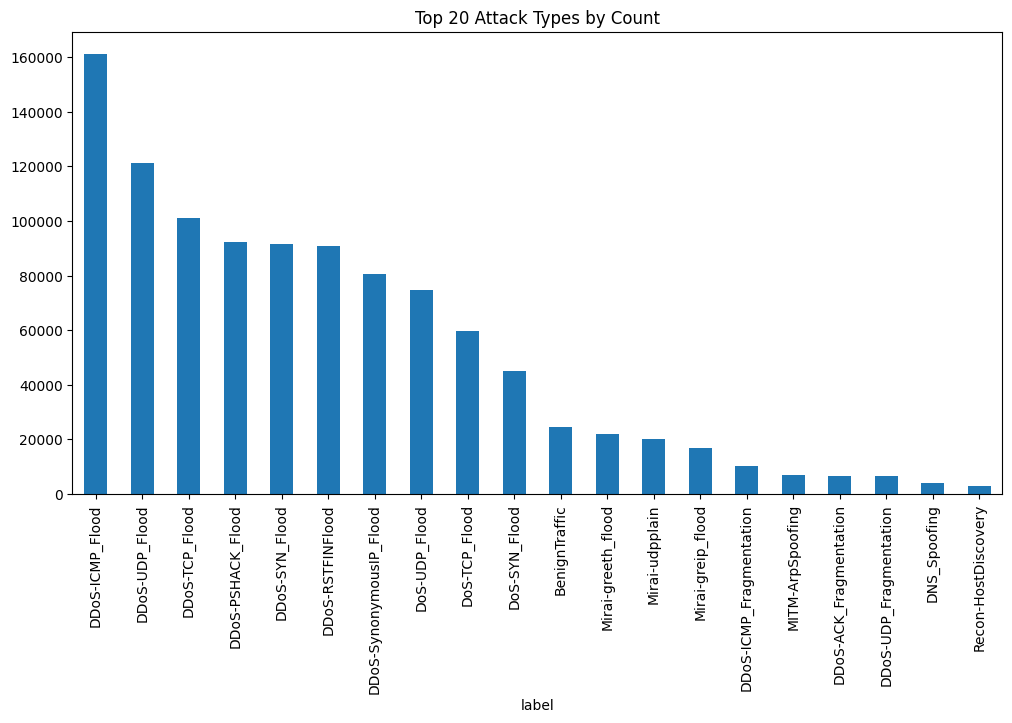

In [12]:
plt.figure(figsize=(12,6))
df['label'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Attack Types by Count")
plt.show()


### Exploratory Data Analysis

In [13]:
# Visualization style
sns.set_theme(
    style="whitegrid",
    palette="crest",   # elegant blue-green palette
    font_scale=1.2
)

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.edgecolor"] = "#333333"
plt.rcParams["patch.edgecolor"] = "#333333"
plt.rcParams["figure.autolayout"] = True

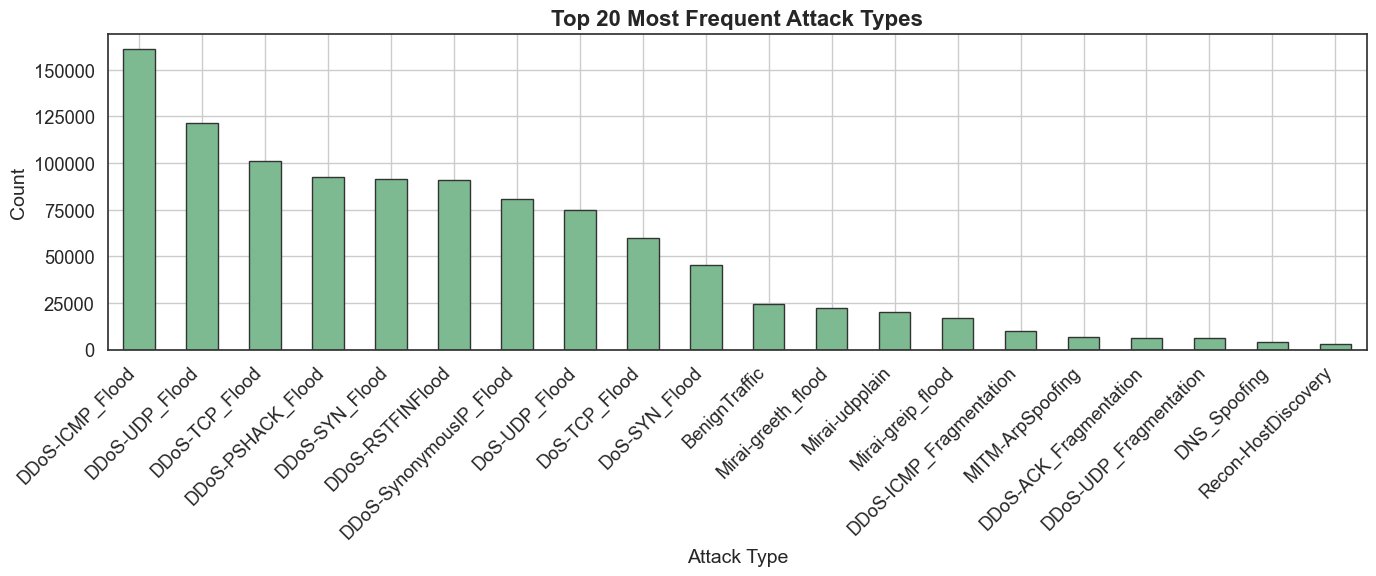

In [14]:
# Top 20 Most Frequent Attack Types

plt.figure(figsize=(14,6))
df['label'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

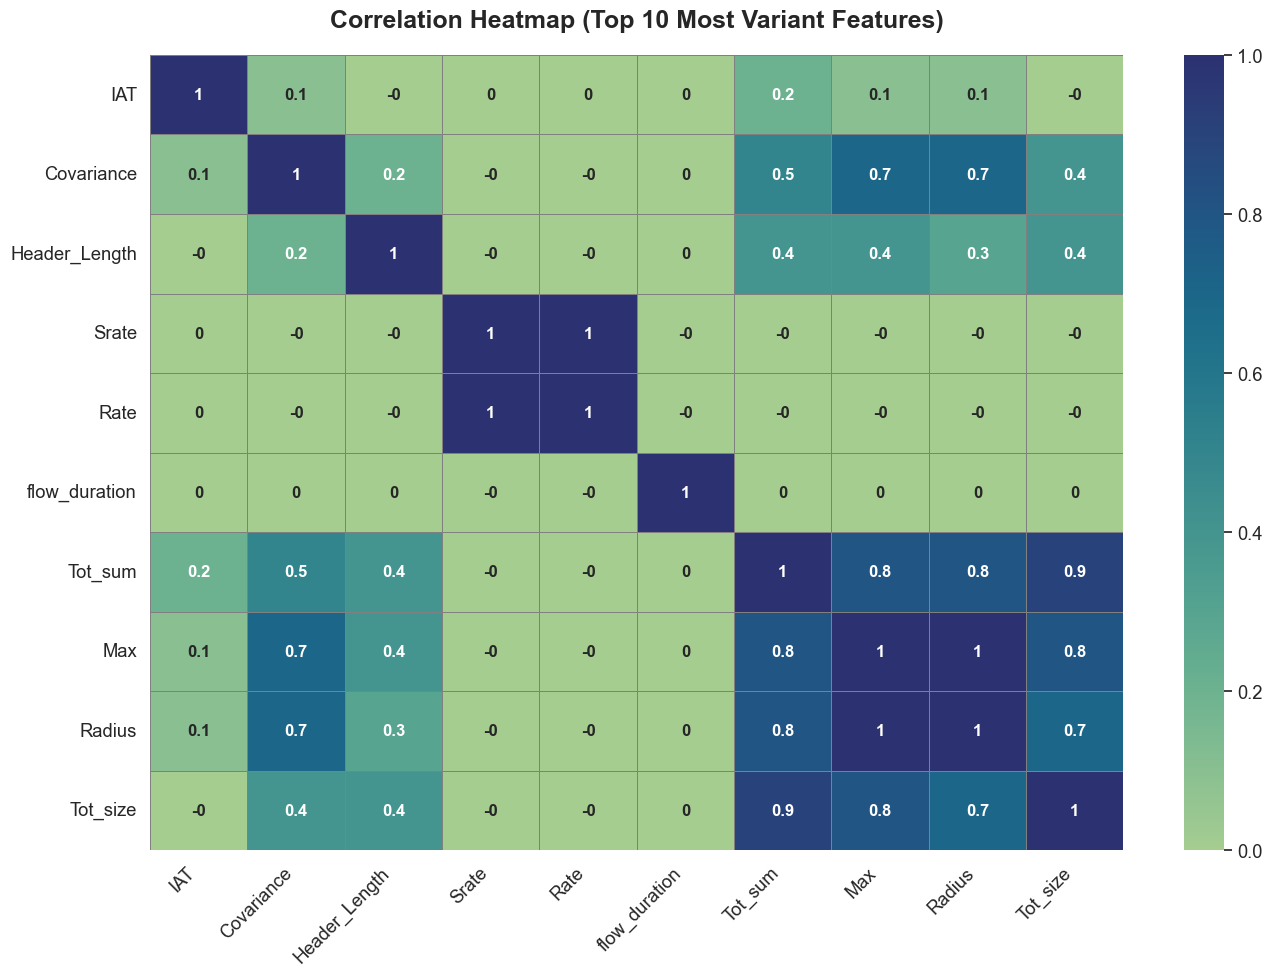

In [15]:
# Correlation Heatmap

from sklearn.feature_selection import VarianceThreshold

# Select numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Variance selector
selector = VarianceThreshold(threshold=0)
selector.fit(numeric_df)

# Extract feature names + variances
feature_names = numeric_df.columns
variances = selector.variances_

# Top 10 high-variance features
top10 = pd.Series(variances, index=feature_names).sort_values(ascending=False).head(10).index

# Compute correlation matrix for these features
corr_top10 = numeric_df[top10].corr().round(1)   # <-- round to 1 decimal

# Plot
plt.figure(figsize=(14, 10))  # larger figure for readability
sns.heatmap(
    corr_top10,
    annot=True,
    cmap="crest",
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"size": 12, "weight": "bold"}  # clearer numbers
)

plt.title("Correlation Heatmap (Top 10 Most Variant Features)", fontsize=18, weight="bold", pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


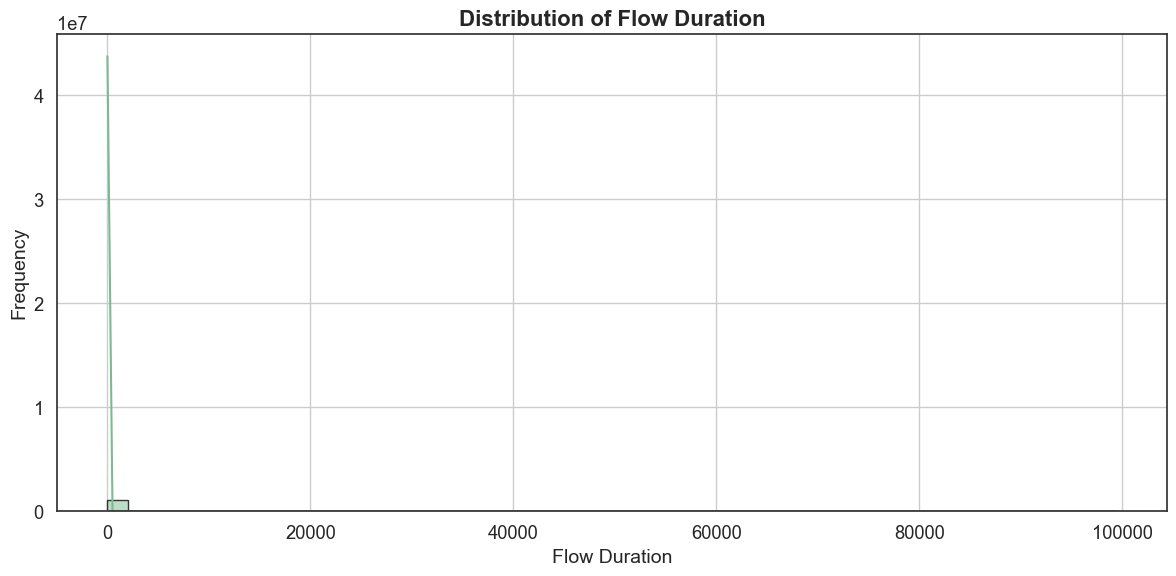

In [16]:
# Distribution of Flow Duration

sns.histplot(df['flow_duration'], bins=50, kde=True)
plt.title("Distribution of Flow Duration")
plt.xlabel("Flow Duration")
plt.ylabel("Frequency")
plt.show()

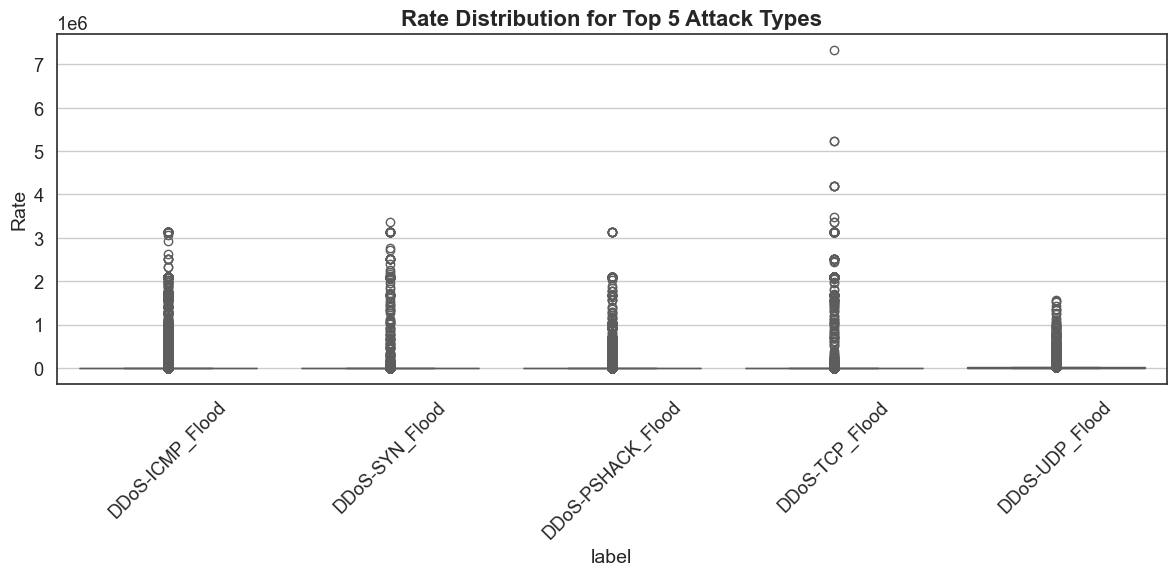

In [17]:
# Rate Distribution for Top 5 Attack Types

top5 = df['label'].value_counts().head(5).index
subset = df[df['label'].isin(top5)]

sns.boxplot(x='label', y='Rate', data=subset)
plt.title("Rate Distribution for Top 5 Attack Types")
plt.xticks(rotation=45)
plt.show()

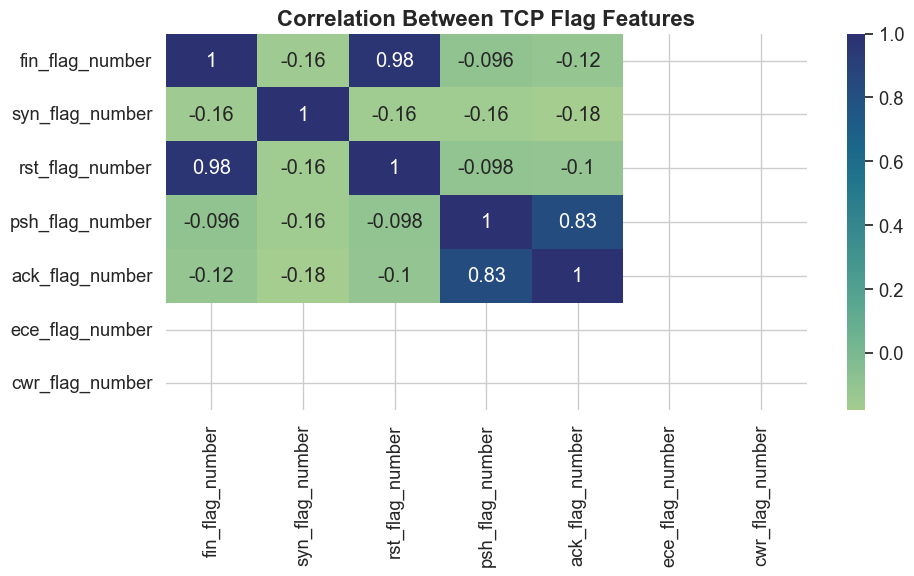

In [18]:
# TCP Flag Correlation Heatmap

tcp_flags = [
    'fin_flag_number','syn_flag_number','rst_flag_number',
    'psh_flag_number','ack_flag_number','ece_flag_number','cwr_flag_number'
]

plt.figure(figsize=(10,6))
sns.heatmap(df[tcp_flags].corr(), annot=True, cmap='crest')
plt.title("Correlation Between TCP Flag Features")
plt.show()

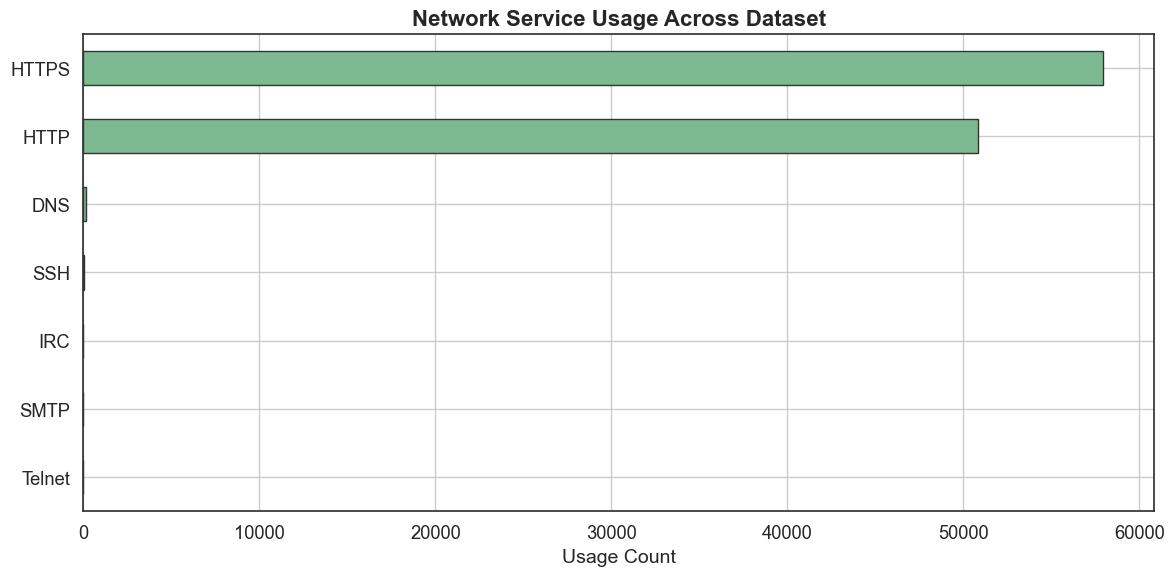

In [19]:
# Network Service Usage

services = ['HTTP','HTTPS','DNS','Telnet','SMTP','SSH','IRC']

df[services].sum().sort_values().plot(kind='barh')
plt.title("Network Service Usage Across Dataset")
plt.xlabel("Usage Count")
plt.show()

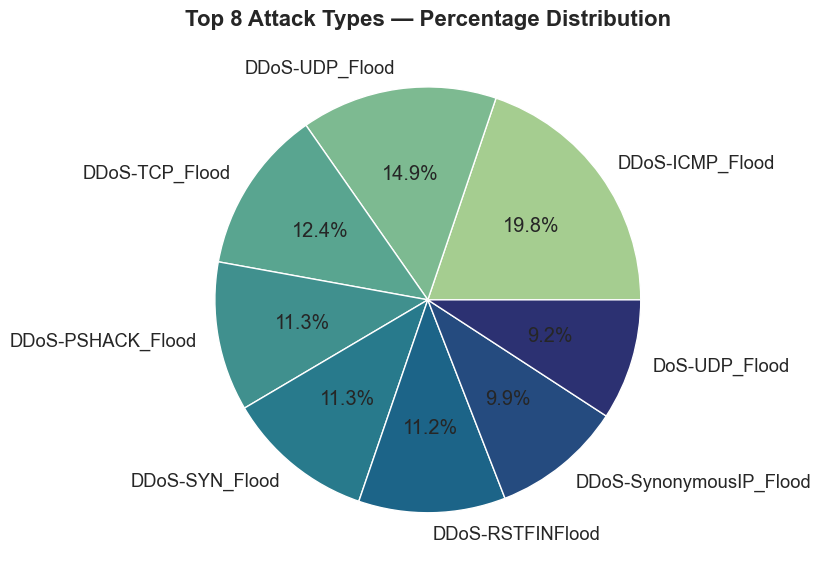

In [20]:
# Pie Chart of Top 8 Attack Types

df['label'].value_counts().head(8).plot(
    kind='pie',
    autopct='%1.1f%%',
    cmap='crest',
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("Top 8 Attack Types — Percentage Distribution")
plt.ylabel("")
plt.show()

## Machine Learning Modeling

In [21]:
X = df.drop(['label', 'label_encoded'], axis=1)

y = df['label_encoded']

In [24]:
X

,flow_duration,Header_Length,Protocol_Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot_sum,Min,Max,AVG,Std,Tot_size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,1,0,0,0,0,0,0,1,0,0,0,0,1,1,581.33,54.00,66.3,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,525.00,50.00,50.0,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,0,0,0,0,0.0,1.01,0.04,0.0,0.02,0,0,0,0,0,0,0,1,0,0,0,0,1,1,644.60,57.88,131.6,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,0,0,0,0,0.0,2.00,0.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6193.32,569.32,592.0,590.691450,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,1,525.00,50.00,50.0,50.000000,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,0,0,0,0,1.0,0.00,1.00,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55


#### Logistic Regression (Baseline)

Performing Logistic Regression on 10% of data (about 100k rows)

In [25]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(
    df,
    train_size=0.60,            
    random_state=42,
    stratify=df['label_encoded']  # ensures all classes appear proportionally
)


In [26]:
X = df_sample.drop(['label', 'label_encoded'], axis=1)
y = df_sample['label_encoded']

In [28]:
X.columns

Index(['flow_duration', 'Header_Length', 'Protocol_Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot_sum', 'Min', 'Max', 'AVG', 'Std', 'Tot_size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')

In [30]:
X.shape

(629145, 46)

In [31]:
y.shape

(629145,)

In [32]:
y

843453    12
630095    14
78046     12
904927    23
659213     8
          ..
9734       6
636948    19
725714    12
305684    12
428490    10
Name: label_encoded, Length: 629145, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,

    test_size=0.2,
    random_state=42,
    stratify=y
)

In [40]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=100,
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [45]:
y_pred_lr = log_reg.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Logistic Regression Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_lr, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy : 0.7879582608142797
Precision: 0.7850958242139854
Recall   : 0.7879582608142797
F1 Score : 0.7442403683142653

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.65      0.92      0.76      2937
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        13
           4       0.92      0.97      0.94       771
           5       0.60      0.04      0.07        75
           6       1.00      1.00      1.00     19354
           7       1.00      0.97      0.99      1227
           8       0.99      0.99      0.99     11087
           9       1.00      1.00      1.00     10899
          10       0.64      0.97      0.77     10997
          11       0.00      0.00      0.00        59
          12       0.73      0.68      0.70      9681
          13       0.64      0.97      0.77     12155
          14    

#### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',     # default, but you can try entropy too
    max_depth=None,       # full depth
    random_state=42
)

dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [48]:
y_pred_dt = dt.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Decision Tree Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_dt, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy : 0.9926249115863592
Precision: 0.9925978400456624
Recall   : 0.9926249115863592
F1 Score : 0.992604649284912

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.91      0.92      0.91      2937
           2       0.38      0.29      0.33        17
           3       0.56      0.69      0.62        13
           4       0.99      0.99      0.99       771
           5       0.99      0.95      0.97        75
           6       1.00      1.00      1.00     19354
           7       1.00      1.00      1.00      1227
           8       1.00      1.00      1.00     11087
           9       1.00      1.00      1.00     10899
          10       1.00      1.00      1.00     10997
          11       0.93      0.97      0.95        59
          12       1.00      1.00      1.00      9681
          13       1.00      1.00      1.00     12155
          14       1.00

#### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,       
    max_depth=None,        
    class_weight='balanced',  
    n_jobs=-1,            
    random_state=42
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [51]:
y_pred_rf = rf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy : 0.9916632890669083
Precision: 0.9916897936557776
Recall   : 0.9916632890669083
F1 Score : 0.9910168538857953

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      0.99      0.89      2937
           2       0.00      0.00      0.00        17
           3       1.00      0.31      0.47        13
           4       1.00      0.99      0.99       771
           5       0.99      0.96      0.97        75
           6       1.00      1.00      1.00     19354
           7       0.98      1.00      0.99      1227
           8       1.00      1.00      1.00     11087
           9       1.00      1.00      1.00     10899
          10       1.00      1.00      1.00     10997
          11       0.89      0.95      0.92        59
          12       1.00      1.00      1.00      9681
          13       1.00      1.00      1.00     12155
          14       1.00

#### XGBoost

In [53]:
# !pip install xgboost

In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='multi:softmax',   # Multi-class classification
    num_class=len(df['label_encoded'].unique()),
    max_depth=10,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    tree_method='hist',   # FAST on large datasets
    random_state=42
)

xgb.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softmax'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fro

In [55]:
y_pred_xgb = xgb.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("XGBoost Results")
print("----------------")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_xgb, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results
----------------
Accuracy : 0.9923547036056871
Precision: 0.9916190697200177
Recall   : 0.9923547036056871
F1 Score : 0.9917300322104551

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.87      0.96      0.92      2937
           2       0.00      0.00      0.00        17
           3       1.00      0.23      0.38        13
           4       1.00      1.00      1.00       771
           5       0.96      0.96      0.96        75
           6       1.00      1.00      1.00     19354
           7       1.00      1.00      1.00      1227
           8       1.00      1.00      1.00     11087
           9       1.00      1.00      1.00     10899
          10       1.00      1.00      1.00     10997
          11       0.89      0.98      0.94        59
          12       1.00      1.00      1.00      9681
          13       1.00      1.00      1.00     12155
          14

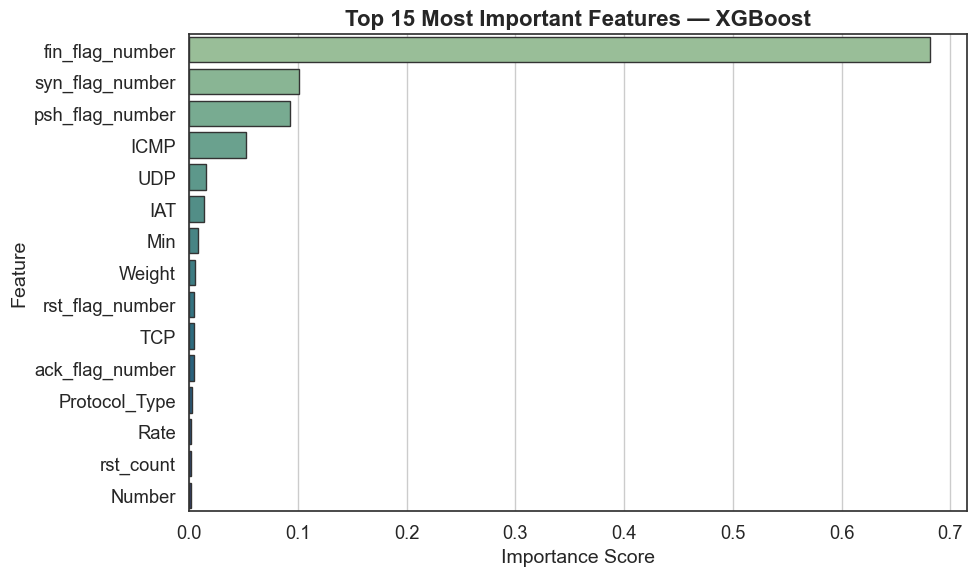

In [57]:
import numpy as np

importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X_train.columns[indices][:15]  # top 15 features

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=top_features, palette="crest")
plt.title("Top 15 Most Important Features — XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


#### Multi-Layer Perceptron Neural Network

In [58]:
from sklearn.preprocessing import StandardScaler

scaler_mlp = StandardScaler()
X_train_mlp = scaler_mlp.fit_transform(X_train)
X_test_mlp = scaler_mlp.transform(X_test)

In [59]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=80,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train_mlp, y_train)

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(64, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",80
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [60]:
y_pred_mlp = mlp.predict(X_test_mlp)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

mlp_acc  = accuracy_score(y_test, y_pred_mlp)
mlp_prec = precision_score(y_test, y_pred_mlp, average='weighted')
mlp_rec  = recall_score(y_test, y_pred_mlp, average='weighted')
mlp_f1   = f1_score(y_test, y_pred_mlp, average='weighted')

print("MLP Neural Network Results")
print("--------------------------")
print("Accuracy :", mlp_acc)
print("Precision:", mlp_prec)
print("Recall   :", mlp_rec)
print("F1 Score :", mlp_f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Neural Network Results
--------------------------
Accuracy : 0.9848604057888086
Precision: 0.9840861092473322
Recall   : 0.9848604057888086
F1 Score : 0.9839282935902124

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.80      0.95      0.87      2937
           2       0.00      0.00      0.00        17
           3       0.50      0.08      0.13        13
           4       0.99      0.98      0.98       771
           5       0.88      0.65      0.75        75
           6       1.00      1.00      1.00     19354
           7       0.98      0.98      0.98      1227
           8       1.00      1.00      1.00     11087
           9       1.00      1.00      1.00     10899
          10       0.99      1.00      1.00     10997
          11       0.60      0.73      0.66        59
          12       1.00      1.00      1.00      9681
          13       1.00      1.00      1.00  

#### KERAS MLP

In [62]:
from sklearn.preprocessing import StandardScaler

scaler_dl = StandardScaler()
X_train_dl = scaler_dl.fit_transform(X_train)
X_test_dl = scaler_dl.transform(X_test)

In [91]:
X_train_dl[1].shape

(46,)

In [101]:
import joblib

joblib.dump(scaler_dl, 'iot_scaled.pkl')

print("X_train data successfully saved to 'iot_scaled.pkl'.")

X_train data successfully saved to 'iot_scaled.pkl'.


In [78]:
X_train.head(1)

,flow_duration,Header_Length,Protocol_Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot_sum,Min,Max,AVG,Std,Tot_size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
904903,0.0,0.74,1.05,65.68,1.506567,1.506567,0.0,0,0,0,0,0,0,0,0.0,0.01,0.0,0.0,0.01,0,0,0,0,0,0,0,0,0,0,0,1,1,1,442.28,42.0,43.28,42.069443,0.289791,42.32,83128149.81,9.5,9.172741,0.412249,2.125368,0.04,141.55


In [95]:
first_row = df.iloc[0]
print("\nfirst_row ", first_row.size)
print("--- First Row Key: Value ---")
for key, value in first_row.items():
    print(f"{key}: {value}\n")


first_row  48
--- First Row Key: Value ---
flow_duration: 0.0

Header_Length: 54.0

Protocol_Type: 6.0

Duration: 64.0

Rate: 0.329807153

Srate: 0.329807153

Drate: 0.0

fin_flag_number: 1

syn_flag_number: 0

rst_flag_number: 1

psh_flag_number: 0

ack_flag_number: 0

ece_flag_number: 0

cwr_flag_number: 0

ack_count: 1.0

syn_count: 0.0

fin_count: 1.0

urg_count: 0.0

rst_count: 0.0

HTTP: 0

HTTPS: 0

DNS: 0

Telnet: 0

SMTP: 0

SSH: 0

IRC: 0

TCP: 1

UDP: 0

DHCP: 0

ARP: 0

ICMP: 0

IPv: 1

LLC: 1

Tot_sum: 567.0

Min: 54.0

Max: 54.0

AVG: 54.0

Std: 0.0

Tot_size: 54.0

IAT: 83343831.92

Number: 9.5

Magnitue: 10.39230485

Radius: 0.0

Covariance: 0.0

Variance: 0.0

Weight: 141.55

label: DDoS-RSTFINFlood

label_encoded: 9



In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


X_train_torch = torch.tensor(X_train_dl, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)

X_test_torch = torch.tensor(X_test_dl, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)


train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256)

In [64]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

input_dim = X_train_dl.shape[1]
num_classes = len(df['label_encoded'].unique())

model = MLP(input_dim, num_classes)

In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [66]:
train_losses = []
train_accs = []

for epoch in range(20):
    correct = 0
    total = 0
    epoch_loss = 0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    
    train_losses.append(epoch_loss / len(train_loader))
    train_accs.append(correct / total)
    
    print(f"Epoch {epoch+1}/20 | Loss: {train_losses[-1]:.4f} | Acc: {train_accs[-1]:.4f}")

Epoch 1/20 | Loss: 0.5148 | Acc: 0.7884
Epoch 2/20 | Loss: 0.3895 | Acc: 0.8362
Epoch 3/20 | Loss: 0.3359 | Acc: 0.8634
Epoch 4/20 | Loss: 0.2789 | Acc: 0.8914
Epoch 5/20 | Loss: 0.2188 | Acc: 0.9231
Epoch 6/20 | Loss: 0.1593 | Acc: 0.9542
Epoch 7/20 | Loss: 0.1155 | Acc: 0.9692
Epoch 8/20 | Loss: 0.0901 | Acc: 0.9756
Epoch 9/20 | Loss: 0.0741 | Acc: 0.9792
Epoch 10/20 | Loss: 0.0667 | Acc: 0.9812
Epoch 11/20 | Loss: 0.0607 | Acc: 0.9824
Epoch 12/20 | Loss: 0.0576 | Acc: 0.9831
Epoch 13/20 | Loss: 0.0579 | Acc: 0.9829
Epoch 14/20 | Loss: 0.0529 | Acc: 0.9840
Epoch 15/20 | Loss: 0.0623 | Acc: 0.9787
Epoch 16/20 | Loss: 0.0548 | Acc: 0.9831
Epoch 17/20 | Loss: 0.0532 | Acc: 0.9836
Epoch 18/20 | Loss: 0.0496 | Acc: 0.9847
Epoch 19/20 | Loss: 0.0504 | Acc: 0.9842
Epoch 20/20 | Loss: 0.0488 | Acc: 0.9847


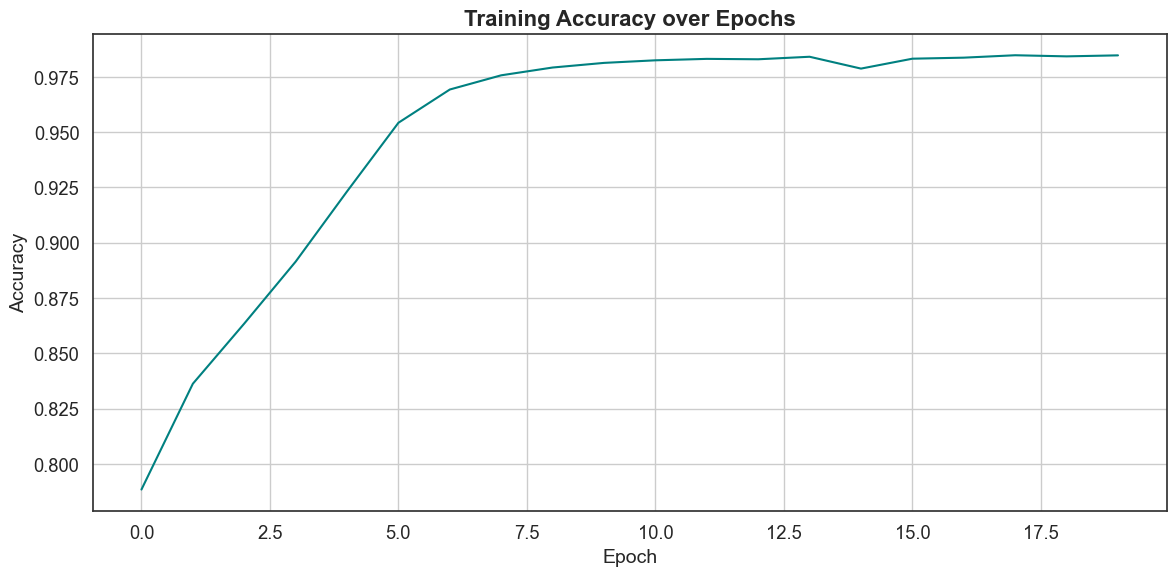

In [67]:
plt.plot(train_accs, label='Training Accuracy', color='teal')
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

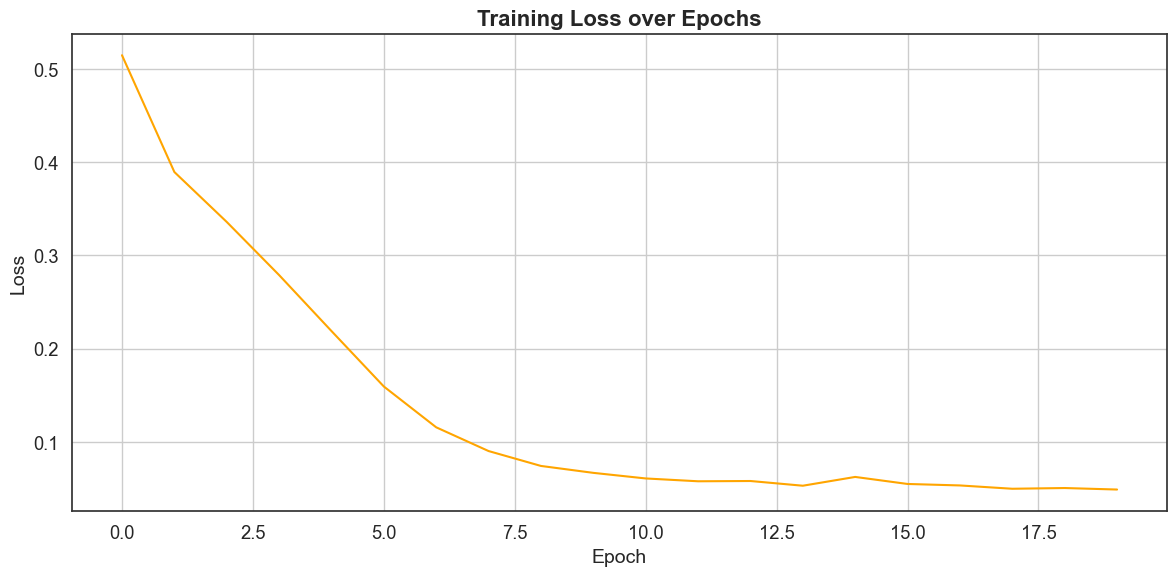

In [68]:
plt.plot(train_losses, label='Training Loss', color='orange')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [69]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    outputs = model(X_test_torch)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test_torch.size(0)
    correct = (predicted == y_test_torch).sum().item()

print("PyTorch MLP Test Accuracy:", correct / total)

PyTorch MLP Test Accuracy: 0.9841292547822839


In [ ]:
MODEL_SAVE_PATH = 'iot_mlp_model_weights.pth'

# Save only the model's learned parameters (state dictionary)
torch.save(model.state_dict(), MODEL_SAVE_PATH)

print(f"PyTorch model weights successfully saved to '{MODEL_SAVE_PATH}'.")

✅ PyTorch model weights successfully saved to 'iot_mlp_model_weights.pth'.


# Inferencing

In [85]:
import joblib
scaler = joblib.load("iot_scaled.pkl")

In [97]:
import joblib
LABEL_ENCODER = joblib.load("iot_label_encoder.pkl")
num_of_classes = len(LABEL_ENCODER.classes_)

print(f"The number of classes found in the encoder is: {num_of_classes}")

The number of classes found in the encoder is: 34


In [96]:
num_classes

34

In [102]:
import joblib
import torch
import torch.nn as nn
import numpy as np

# --- 1. Define the MLP Architecture ---
# INPUT_DIM is still required and assumed to be 46 based on your dummy data length.
INPUT_DIM = 46  
# NUM_CLASSES will be dynamically loaded in Step 2.

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

# --- 2. Load All Artifacts (Updated for Dynamic NUM_CLASSES) ---
try:
    # Load Scaler
    SCALER = joblib.load("iot_scaled.pkl")
    
    # Load Label Encoder FIRST to determine class count
    LABEL_ENCODER = joblib.load("iot_label_encoder.pkl")
    NUM_CLASSES = len(LABEL_ENCODER.classes_)
    
    # Load PyTorch Model
    MODEL = MLP(INPUT_DIM, NUM_CLASSES) # Use the dynamically determined class count
    MODEL.load_state_dict(torch.load("iot_mlp_model_weights.pth"))
    MODEL.eval() # Set model to evaluation mode for inference
    
    print(f"✅ All artifacts loaded. Model initialized with {INPUT_DIM} features and {NUM_CLASSES} classes.")

except FileNotFoundError as e:
    print(f"FATAL ERROR: Required file not found: {e}")
    # In a real app, you would stop execution here
    raise

# --- 3. The Prediction Function (No changes needed here, it uses the global loaded artifacts) ---
def predict_iot_attack(raw_input_features: list) -> dict:
    """
    Takes a list of raw, unscaled feature values and returns the prediction.
    """
    
    # Step 1: Data Preparation
    input_array = np.array([raw_input_features], dtype=np.float32)
    
    # Step 2: Preprocessing (Scaling)
    scaled_input = SCALER.transform(input_array)
    
    # Step 3: PyTorch Conversion
    input_tensor = torch.tensor(scaled_input, dtype=torch.float32)
    
    # Step 4: Inference
    with torch.no_grad():
        output_logits = MODEL(input_tensor)
        
        # Get the predicted class index (highest logit)
        _, predicted_index_tensor = torch.max(output_logits.data, 1)
        predicted_index = predicted_index_tensor.item()
        
        # Calculate Confidence (using softmax for probabilities)
        probabilities = torch.softmax(output_logits, dim=1)
        confidence = torch.max(probabilities).item() * 100
        
    # Step 5: Post-processing (Label Mapping)
    predicted_class = LABEL_ENCODER.inverse_transform([predicted_index])[0]

    return {
        "predicted_class": predicted_class,
        "confidence": confidence
    }

# --- Example Usage (Using your dummy data) ---
dummy_raw_data = [
    0.0, 54.0, 6.0, 64.0, 0.329, 0.329, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
    0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 567.0, 54.0, 54.0, 54.0, 0.0, 54.0, 83343831.92, 9.5, 10.392, 0.0, 0.0, 0.0,
    141.55
]

if len(dummy_raw_data) == INPUT_DIM:
    inference_result = predict_iot_attack(dummy_raw_data)
    
    print("\n--- INFERENCE RESULT ---")
    print(f"Prediction: {inference_result['predicted_class']}")
    print(f"Confidence: {inference_result['confidence']:.2f}%")
else:
    print(f"\nERROR: Dummy data size ({len(dummy_raw_data)}) does not match expected input dimension ({INPUT_DIM}).")

✅ All artifacts loaded. Model initialized with 46 features and 34 classes.

--- INFERENCE RESULT ---
Prediction: DDoS-RSTFINFlood
Confidence: 100.00%
